In [1]:
# !pip install xlrd
# pip install openpyxl # 최신 xlsx 용

In [4]:
from hdfs import InsecureClient
from io import BytesIO
import pandas as pd

In [15]:
hdfs = InsecureClient('http://namenode:9870',user="hadoop")
hdfs_path ='/user/hadoop/upload_oil/'

file_list = hdfs.list(hdfs_path)
datas = []
for n in file_list:
    # print(hdfs_path + n) 
    with hdfs.read(hdfs_path + n) as reader:
        raw_data = reader.read() # 전체 내용을 바이트로 읽음
        buffer = BytesIO(raw_data)
        df = pd.read_excel(buffer, skiprows=2, engine="xlrd")
        datas.append(df)
total = pd.concat(datas)
total

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,한길주유소 금사점 한솔유화㈜,부산 금정구 반송로 420 (금사동),HD현대오일뱅크,051-524-6642,Y,1897,1549,1409,-
1,부산광역시,훼미리알뜰주유소,부산 금정구 두실로 2,알뜰주유소,051-582-5882,Y,-,1575,1437,-
2,부산광역시,은마석유 노포주유소,부산 금정구 중앙대로 2191 (노포동),GS칼텍스,051-508-1645,Y,1849,1575,1437,1350
3,부산광역시,청룡명품주유소,부산 금정구 중앙대로 2130,HD현대오일뱅크,051-508-5150,Y,-,1575,1437,-
4,부산광역시,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),알뜰주유소,051-583-6433,Y,-,1587,1457,-
...,...,...,...,...,...,...,...,...,...,...
46,부산광역시,(주)서호주유소,부산 강서구 명지국제2로28번길 36,S-OIL,051-206-6661,Y,1988,1678,1518,-
47,부산광역시,만선주유소,부산 강서구 가락대로210번길 102,HD현대오일뱅크,051-831-9171,N,-,1698,1558,-
48,부산광역시,비케이원(주) 미래드림주유소,부산 강서구 가락대로 649,HD현대오일뱅크,051-974-0808,Y,-,1709,1559,-
49,부산광역시,대양산업(주)대양가덕주유소,부산 강서구 거가대로 2571,GS칼텍스,051-715-2201,Y,-,1788,1638,1400


In [16]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 50
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      347 non-null    object
 1   상호      347 non-null    object
 2   주소      347 non-null    object
 3   상표      347 non-null    object
 4   전화번호    347 non-null    object
 5   셀프여부    347 non-null    object
 6   고급휘발유   347 non-null    object
 7   휘발유     347 non-null    object
 8   경유      347 non-null    object
 9   실내등유    347 non-null    object
dtypes: object(10)
memory usage: 29.8+ KB


In [17]:
total = total[['상표','상호','주소','휘발유','셀프여부']]
total

,상표,상호,주소,휘발유,셀프여부
0,HD현대오일뱅크,한길주유소 금사점 한솔유화㈜,부산 금정구 반송로 420 (금사동),1549,Y
1,알뜰주유소,훼미리알뜰주유소,부산 금정구 두실로 2,1575,Y
2,GS칼텍스,은마석유 노포주유소,부산 금정구 중앙대로 2191 (노포동),1575,Y
3,HD현대오일뱅크,청룡명품주유소,부산 금정구 중앙대로 2130,1575,Y
4,알뜰주유소,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),1587,Y
...,...,...,...,...,...
46,S-OIL,(주)서호주유소,부산 강서구 명지국제2로28번길 36,1678,Y
47,HD현대오일뱅크,만선주유소,부산 강서구 가락대로210번길 102,1698,N
48,HD현대오일뱅크,비케이원(주) 미래드림주유소,부산 강서구 가락대로 649,1709,Y
49,GS칼텍스,대양산업(주)대양가덕주유소,부산 강서구 거가대로 2571,1788,Y


In [19]:
total2 = total.copy()
total2['구'] = [addr.split()[1] for addr in total2['주소']]
total2.sample(7)

,상표,상호,주소,휘발유,셀프여부,구
11,알뜰주유소,선암주유소,부산 기장군 장안읍 기장대로 1453,1565,Y,기장군
0,HD현대오일뱅크,한길주유소 금사점 한솔유화㈜,부산 금정구 반송로 420 (금사동),1549,Y,금정구
31,SK에너지,성경주유소,부산 사상구 모덕로 69 (모라동),1638,N,사상구
20,HD현대오일뱅크,은마석유(주)신호주유소,부산 강서구 낙동남로 514,1569,Y,강서구
21,알뜰주유소,삼화주유소,부산 남구 우암로 92 (감만동),1615,N,남구
36,SK에너지,KH에너지㈜직영 장안주유소(부산방향),부산 기장군 장안읍 동해고속도로 25,1628,Y,기장군
3,알뜰주유소,우리주유소 (주)시블링스,부산 사상구 백양대로 701 (덕포동),1559,Y,사상구


In [30]:
validation =  total2['구'].unique()
print(validation,len(validation))

['금정구' '서구' '수영구' '연제구' '영도구' '중구' '해운대구' '기장군' '남구' '동구' '동래구' '부산진구'
 '북구' '사상구' '사하구' '강서구'] 16


In [38]:
# 결측값 제거
# total2[total2['휘발유'].isna()]
total2 = total2[total2['휘발유'] != '-']
total3 = total2.copy()
# total2[total2['휘발유'] == '-']

In [40]:
total2.info()
total3['휘발유'] = pd.to_numeric(total3['휘발유'], errors='coerce')
total3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상표      343 non-null    object
 1   상호      343 non-null    object
 2   주소      343 non-null    object
 3   휘발유     343 non-null    object
 4   셀프여부    343 non-null    object
 5   구       343 non-null    object
dtypes: object(6)
memory usage: 18.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상표      343 non-null    object
 1   상호      343 non-null    object
 2   주소      343 non-null    object
 3   휘발유     343 non-null    int64 
 4   셀프여부    343 non-null    object
 5   구       343 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.8+ KB


In [42]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

Text(0.2, 0.4, '한글')

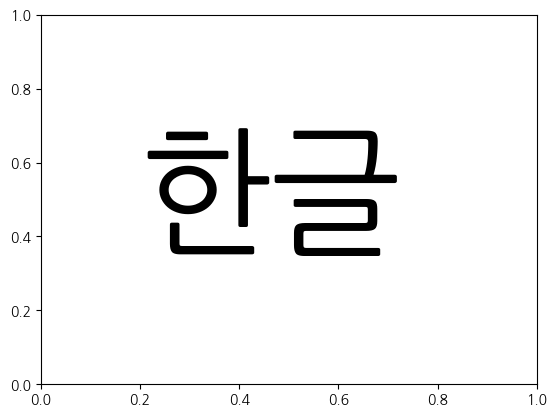

In [47]:
# 윈도우에서 폰트조회
# import matplotlib.font_manager as fm
# fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# fontlist
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

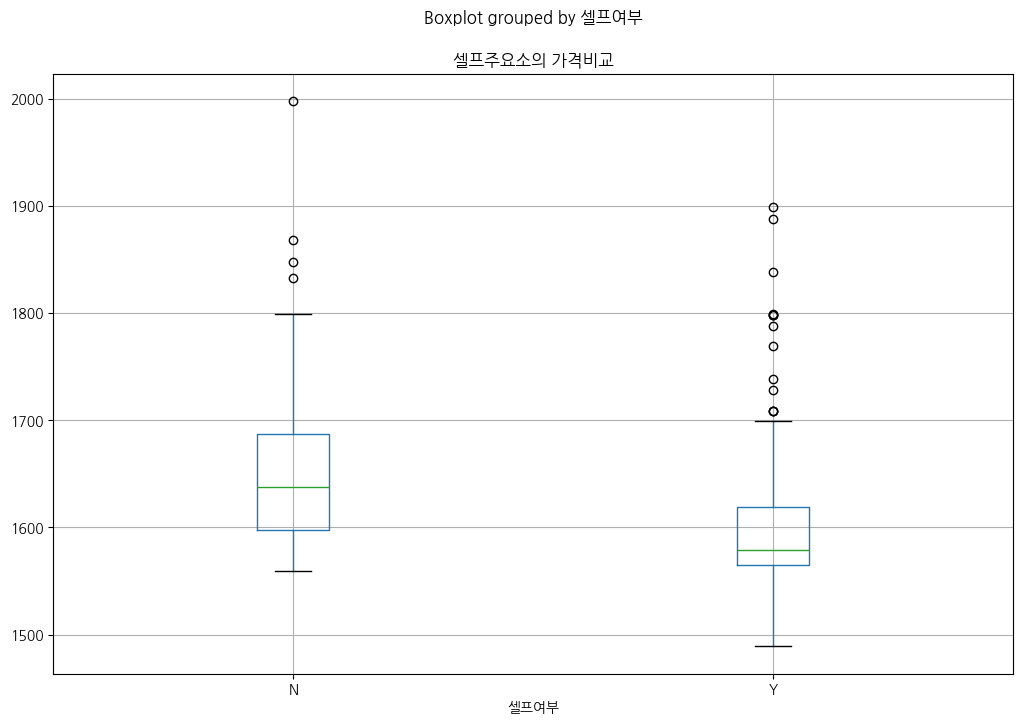

In [51]:
total3.boxplot(column="휘발유", by="셀프여부", figsize=(12,8))
plt.title("셀프주요소의 가격비교")
plt.show()

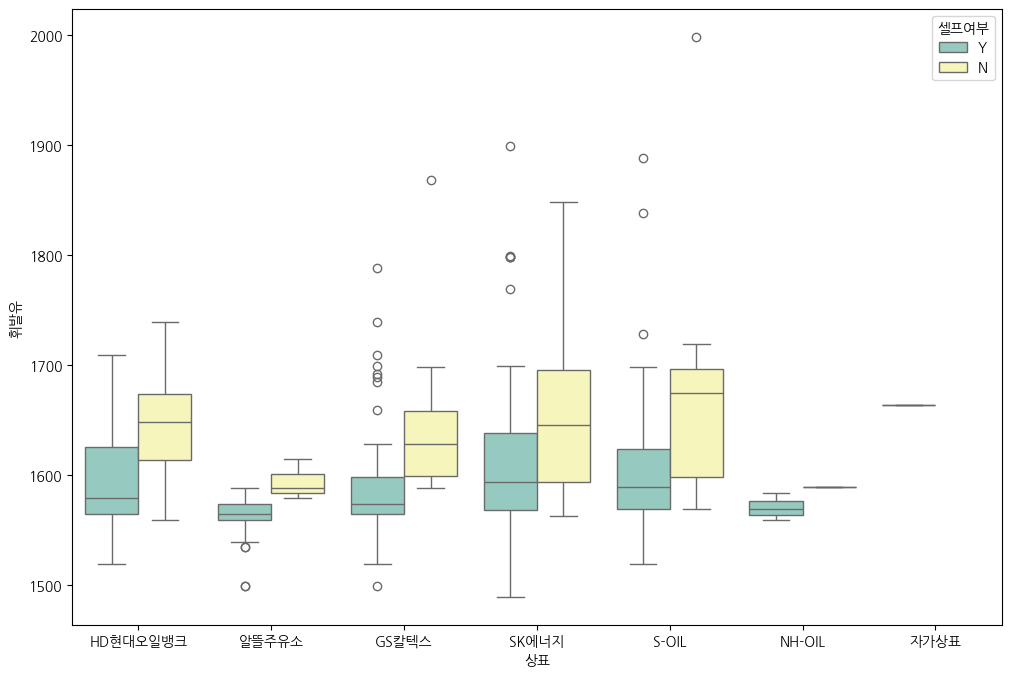

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="휘발유", hue="셀프여부", data= total3, palette="Set3")
plt.show()

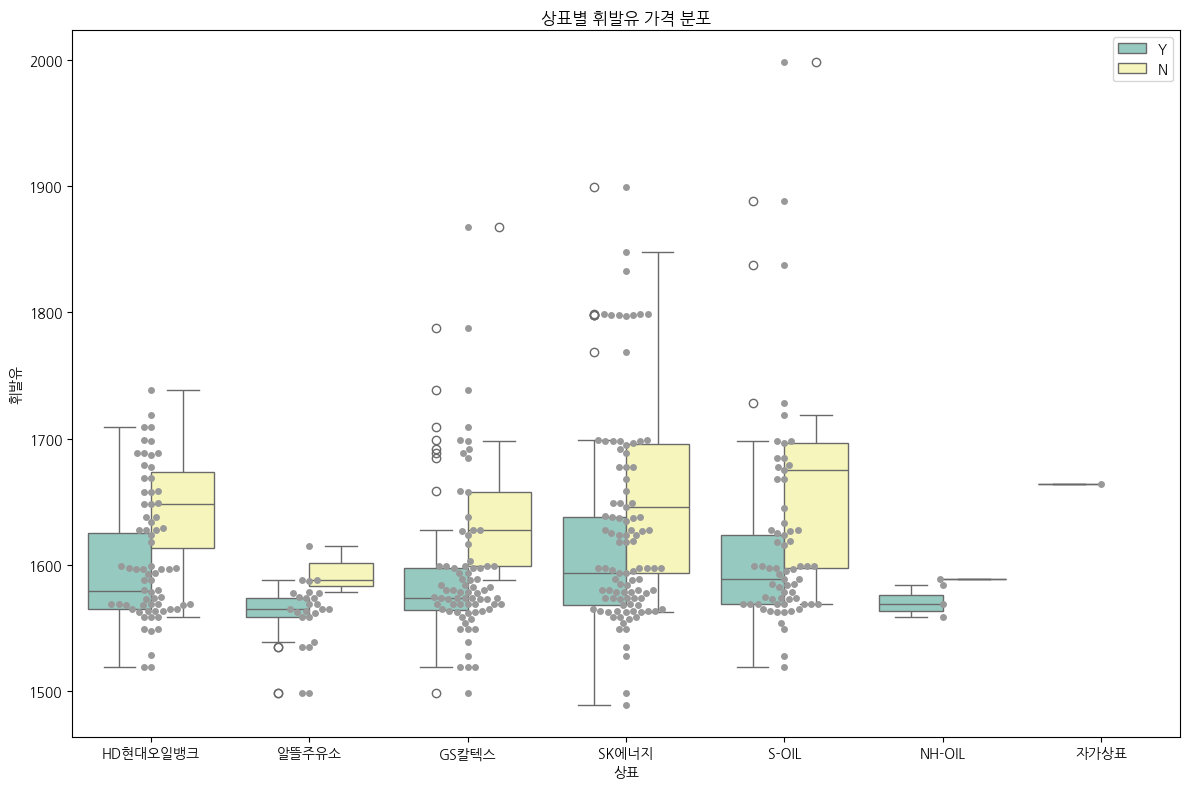

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="휘발유", hue="셀프여부", data= total3, palette="Set3")
sns.swarmplot(x="상표", y="휘발유", data= total3, color=".6")
plt.title("상표별 휘발유 가격 분포")
plt.tight_layout()
plt.show()